# 필요한 패키지 import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# 데이터 로드 및 확인

1338개의 사람에 대해서 7가지 컬럼 정보를 확인 할 수 있습니다.

In [3]:
data_pandas = pd.read_csv("../data/insurance.csv")
display(data_pandas)

data = data_pandas.to_numpy()
print(data[0]) # index [4] is smoker 'yes'
print(data[1]) # index [4] is smoker 'no'
print(data[2]) # index [4] is smoker 'no'

print(data.shape)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


[19 'female' 27.9 0 'yes' 'southwest' 16884.924]
[18 'male' 33.77 1 'no' 'southeast' 1725.5523]
[28 'male' 33.0 3 'no' 'southeast' 4449.462]
(1338, 7)


# 데이터 전처리

데이터 처리를 위해서 문자열("yes"/"no")을 숫자로 바꿉니다.

 - 흡연자인 경우 index [4] == "yes" -> 1

 - 비흡연자인 경우 index [4] == "no" -> 0



In [8]:
# yes -> 1, no -> 0
for i in range(data.shape[0]):
  if data[i, 4] == "yes":
    data[i, 4] = 1
  elif data[i, 4] == "no":
    data[i, 4] = 0

print(data)

[[19 'female' 27.9 ... 1 'southwest' 16884.924]
 [18 'male' 33.77 ... 0 'southeast' 1725.5523]
 [28 'male' 33.0 ... 0 'southeast' 4449.462]
 ...
 [18 'female' 36.85 ... 0 'southeast' 1629.8335]
 [21 'female' 25.8 ... 0 'southwest' 2007.945]
 [61 'female' 29.07 ... 1 'northwest' 29141.3603]]


또는 LabelEncoder를 통해 편하게 바꿀 수 있습니다.

In [21]:
non_numeric_columns = data_pandas.select_dtypes(exclude=np.number).columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in non_numeric_columns:
    data_pandas[i] = label_encoder.fit_transform(data_pandas[i])
print(data_pandas)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


학습에 사용할 데이터 0~999 까지의 사람에 대해서 데이터를 추출하고 확인 합니다.

- X_train은 보험료
- Y_train은 흡연여부

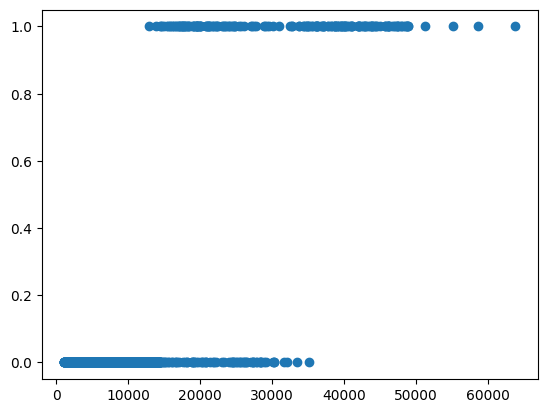

In [9]:
X_train = data[:1000, -1].reshape(-1, 1) # X is charges
Y_train = data[:1000, 4].astype("int") # Y is smoker

plt.scatter(X_train, Y_train)

# 학습 시작

위에서 추출한 0~999명의 흡연여부와 보험료 데이터를 `LogisticRegression`에 `fit`함수로 학습을 시킵니다.

In [4]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

# 모델 테스트
## 1단계: 테스트 데이터셋을 가져오기
학습에 쓰인 데이터셋 1000개를 제외한 나머지 테스트 데이터셋(1000~1338번째 사람)에 대해서 데이터를 추출합니다.
 - X_test : 보험료
 - Y_test : 흡연여부

## 2단계: 예측치와 정답이 맞는지 비교하기
테스트 데이터셋으로 `predict`을 실행하여 정답과 비교합니다.
우리는 앞에서 보험료에 따른 흡연 여부를 예측 할 수 있는 로지스틱회귀 모델을 만들었습니다.
score 함수를 이용해서 모델의 성능을 평가해볼 수 있습니다.

In [16]:
X_test = data[1000:, -1].reshape(-1, 1) # X is charges
Y_test = data[1000:, 4].astype("int") # Y is smoker

Y_predict = logistic_regression.predict(X_test)
score = logistic_regression.score(X_test, Y_test)
print(f"score = {score}")

score = 0.8994082840236687
